In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy.random as rd
from fractions import *
import scipy as sp
from functools import *
from IPython.display import display, Math
from scipy.integrate import odeint

2024-09-20 10:46:35.482693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-20 10:46:35.540596: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-20 10:46:35.558932: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-20 10:46:35.662886: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-20 10:46:36.772092: W tensorflow/compiler/tf2

In [50]:
"""
# Version 1
NoN = 2 # Number output of NN

def SinActv(input_):
        return tf.math.sin(input_)

class NN(tf.keras.Model):
    def __init__(self):
        super(NN, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units = 64, activation=SinActv)
        self.hidden_layer_2 = tf.keras.layers.Dense(units = 64, activation=SinActv)
        self.hidden_layer_3 = tf.keras.layers.Dense(units = 64, activation=SinActv)
        self.output_layer = tf.keras.layers.Dense(units = NoN, activation=None)  
        
    def call(self, x):
        x = self.hidden_layer_1(x)
        x = self.hidden_layer_2(x)
        x = self.hidden_layer_3(x)
        return self.output_layer(x)

    
def func(x, model):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        u = model(x)
        u_1,u_2 = u[:,0:1],u[:,1:2]
        
        du_1 = tape.gradient(u_1, x)
        du_2 = tape.gradient(u_2, x)
    
    f1 = du_1 - (u_1 - u_1*u_2)
    f2 = du_2 - (u_1*u_2 - u_2)
    return f1, f2


# loss function
def loss_fn(t,model):
    f1, f2 = func(t,model)
    
    # EOM loss
    loss1 = tf.reduce_mean(tf.square(f1)) 
    loss2 = tf.reduce_mean(tf.square(f2)) 
    total_loss = loss1 + loss2
    
    # Condition loss
    u1_u2_0 = model(tf.convert_to_tensor([[0.0]], dtype=tf.float32))
    # Boundary conditions
    u1_0 = 1.5
    u2_0 = 1.0
    u1_0_pred = u1_u2_0[:, 0]
    u2_0_pred = u1_u2_0[:, 1]
    loss_value_bc = tf.square(u1_0_pred - u1_0) + tf.square(u2_0_pred - u2_0) 
    
    total_loss = loss1 + loss2 + loss_value_bc
    
    
    return total_loss
"""

'NoN = 2 # Number output of NN\n\ndef SinActv(input_):\n        return tf.math.sin(input_)\n\nclass NN(tf.keras.Model):\n    def __init__(self):\n        super(NN, self).__init__()\n        self.hidden_layer_1 = tf.keras.layers.Dense(units = 64, activation=SinActv)\n        self.hidden_layer_2 = tf.keras.layers.Dense(units = 64, activation=SinActv)\n        self.hidden_layer_3 = tf.keras.layers.Dense(units = 64, activation=SinActv)\n        self.output_layer = tf.keras.layers.Dense(units = NoN, activation=None)  \n        \n    def call(self, x):\n        x = self.hidden_layer_1(x)\n        x = self.hidden_layer_2(x)\n        x = self.hidden_layer_3(x)\n        return self.output_layer(x)\n\n    \ndef func(x, model):\n    with tf.GradientTape(persistent=True) as tape:\n        tape.watch(x)\n        u = model(x)\n        u_1,u_2 = u[:,0:1],u[:,1:2]\n        \n        du_1 = tape.gradient(u_1, x)\n        du_2 = tape.gradient(u_2, x)\n    \n    f1 = du_1 - (u_1 - u_1*u_2)\n    f2 = du_2

In [2]:
# Version 2
NoN = 2 # Number output of NN

class SinActv(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(SinActv, self).__init__(**kwargs)

    def call(self, inputs):
        return tf.math.sin(inputs)
"""
class NN(tf.keras.Model):
    def __init__(self):
        super(NN, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units=64)
        self.activation_1 = SinActv()
        self.hidden_layer_2 = tf.keras.layers.Dense(units=64)
        self.activation_2 = SinActv()
        self.hidden_layer_3 = tf.keras.layers.Dense(units=64)
        self.activation_3 = SinActv()
        self.output_layer = tf.keras.layers.Dense(units=2, activation=None)  # กำหนดจำนวน units ตามที่ต้องการ

    def call(self, x):
        x = self.hidden_layer_1(x)
        x = self.activation_1(x)
        x = self.hidden_layer_2(x)
        x = self.activation_2(x)
        x = self.hidden_layer_3(x)
        x = self.activation_3(x)
        return self.output_layer(x)
"""
class NN(tf.keras.Model):
    def __init__(self):
        super(NN, self).__init__()
        self.hidden_layer_1 = tf.keras.layers.Dense(units = 64, activation='tanh')
        self.hidden_layer_2 = tf.keras.layers.Dense(units = 64, activation='tanh')
        self.hidden_layer_3 = tf.keras.layers.Dense(units = 64, activation='tanh')
        self.output_layer = tf.keras.layers.Dense(units = NoN, activation=None)  
        
    def call(self, x):
        x = self.hidden_layer_1(x)
        x = self.hidden_layer_2(x)
        x = self.hidden_layer_3(x)
        return self.output_layer(x)  
    


model = NN()   
t_tensor = tf.convert_to_tensor(np.linspace(0, 10, 100).reshape(-1, 1), dtype=tf.float32)

epochs = 3000
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_fn(t_tensor, model)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.numpy()}')

# Results
u_pred = model(t_tensor).numpy()
t_data = np.linspace(0,10,100).reshape(-1,1)
u1_pred, u2_pred = u_pred[:, 0], u_pred[:, 1]

# Plot results
plt.plot(t_data, u1_pred, label='u1(t)')
plt.plot(t_data, u2_pred, label='u2(t)')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.legend()
plt.show()

In [3]:
mo = 3
c =  1.0
n =  1
N =  1000
n_cross = 2 
a0 = 1.0
sa = 0.1 
b0 =  1.0
sb =  0.1
s1 =  0.1
s2 = 1.5
phi_range = np.pi  
phidotin = 0 
ain = 0.00000001
afi = 1.0
#ain = 0.001
rhocrit = 3.0 
rho_m0 = 0.81 
rho_r0 = 0.00027138 
rhol = 2.19
mpl = 2.435e27
 
t_in = 4.42e-5
#t_in = 0.0
t_fi = 1
t = np.linspace(t_in, t_fi, N)

<IPython.core.display.Math object>

0.0 0 0.4235628979689893 1e-08
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[

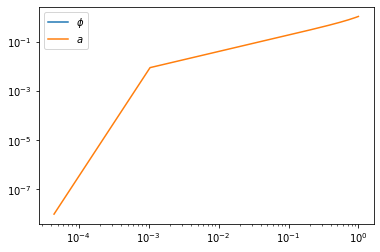

[0.00246358]


In [4]:
def diag(mo,c,n,a0,b0,sa,sb,s1,s2,phi_range,phidotin):
	if mo == 3:

        ######################################
		####          Kahler              ####
		######################################

		k = (a0/np.random.uniform(s1,s2,(n,n))) #random matrix k from log normal distribution
		kT = k.transpose() # transpose of random matrix k
		k2 = np.dot(k,kT)  # Construction of symmeterised Kahler matric for real axion fields
		ev,pT = np.linalg.eigh(k2) # calculation of eigen values and eigen vectors
		fef = np.sqrt(ev)
		p = pT.transpose() # tranpose of rotational matrix constructed of eigen vectors
		kD = reduce(np.dot, [p, k2, pT]) #diagonalisation of Kahler metric
		kD[kD < 1*10**-13] = 0 # removal of computational error terms in off diagonal elements
		kDr = np.zeros((n, n))#creation of empty 3x3 matrix
		np.fill_diagonal(kDr, (1/((2**0.5)*np.sqrt(ev))))# matrix for absolving eigen values of kahler metric into axion fields
		#kDr[kDr > 1*10**23] = 0 # remove computational errors in reciprocal matrix
		kDrT = kDr.transpose() # trasnpose of kDr matrix

		######################################
		####            Mass              ####
		######################################

		m = (np.random.uniform(np.log(b0)-sb,np.log(b0)+sb,(n,n))) #random matrix m from log normal distribution
		mm = np.exp(-m)
		mT = mm.transpose() # transpose of random matrix m
		m2 = np.dot(mm,mT) # symmeterised mass matrix from real axion fields
		mn = reduce(np.dot, [pT,kDrT, m2, kDr,p]) # correct mass matrix caclulation
		ma_array,mv = np.linalg.eigh(mn) # reout of masses from eigenvalues of mn


	phiin_array = rd.uniform(-phi_range,phi_range,n)

	for i in range (0,n):
		phiin_array[i] = phiin_array[i]*fef[i]
	phiin_array=np.dot(mv,phiin_array)

	phidotin_array = [phidotin]*n #### array of phidotin where all are set equal to zero

	####################################################################
	####################################################################

		
	return ma_array,fef,phiin_array,phidotin_array

def rhoinitial(phidotin_array,phiin_array,ma_array,n):
	rhoin_array=[]
	for i in range(n):	
		rhoin_array.append( 0.5*phidotin_array[i]**2 + 0.5*(ma_array[i]**2)*phiin_array[i]**2 )
	return rhoin_array
	
###################################################################	

###################################################################
####                    Initial y array                        ####
###################################################################
	
def yinitial(n,phiin_array,phidotin_array,rhoin_array,ain):
	y0=[]
	for i in range(n):
		y0.append(phiin_array[i])
		y0.append(phidotin_array[i])
		y0.append(rhoin_array[i])
	y0.append(ain)
#	print(y0)
	return y0	

def deriv_rho(y,t,n,ma_array,rho_m0,rho_r0,rhol): 
	func=[]
	rho_ax=sum(y[:-1])
	for i in range(n):
		if np.sqrt(3)*np.sqrt(rho_ax + rho_m0/y[-1]**3 + rho_r0/y[-1]**4 + rhol) > 2*(ma_array[i]):
			func.append((-3/np.sqrt(3)*np.sqrt(rho_ax + rho_m0/y[-1]**3 + rho_r0/y[-1]**4 + rhol)*(1-1)*(y[i])))
		else:
			func.append((-3/np.sqrt(3)*np.sqrt(rho_ax + rho_m0/y[-1]**3 + rho_r0/y[-1]**4 + rhol)*(y[i])))	
	func.append((1/np.sqrt(3)*np.sqrt(rho_ax*y[-1]**2 + rho_m0/y[-1] + rho_r0/y[-1]**2 + rhol*y[-1]**2)))
	return func



def deriv_wfromphi(y, t, n, n_cross, ma_array, rho_m0, rho_r0, rhol):
#def deriv_wfromphi(y, ma_array):
#
    crossing_index = [0]*n
    func = []
    rho_ax = sum(y[2::3])  # ใช้ y แทน y ในการเข้าถึงค่าตัวแปร
#
    for i in range(n):
        if (crossing_index[i] % 2 == 0 and ma_array[i] * y[3*i] * y[3*i] < y[3*i+1] * y[3*i+1] and y[3*i+1] > 0) or \
           (crossing_index[i] % 2 == 1 and ma_array[i] * y[3*i] * y[3*i] > y[3*i+1] * y[3*i+1] and y[3*i+1] < 0):
            crossing_index[i] += 1
        
        func.append(y[3*i+1])  # ใช้ y แทน y ในการเข้าถึงค่าตัวแปร
        if crossing_index[i] < n_cross:
            func.append((-np.sqrt(3) * (np.sqrt(rho_ax + rho_m0 / y[-1]**3 + rho_r0 / y[-1]**4 + rhol)) * y[3*i+1] - (ma_array[i]**2) * y[3*i]))
        else:
            func.append(-np.sqrt(3) * (np.sqrt(rho_ax + rho_m0 / y[-1]**3 + rho_r0 / y[-1]**4 + rhol)) * y[3*i+1])
        
        if crossing_index[i] < n_cross:
            func.append(-3 / np.sqrt(3) * np.sqrt(rho_ax + rho_m0 / y[-1]**3 + rho_r0 / y[-1]**4 + rhol) * y[3*i+1]**2)
        else:
            func.append(-3 / np.sqrt(3) * np.sqrt(rho_ax + rho_m0 / y[-1]**3 + rho_r0 / y[-1]**4 + rhol) * y[3*i+2])

    func.append((1 / np.sqrt(3) * np.sqrt(rho_ax * (y[-1])**2 + rho_m0 / y[-1] + rho_r0 / y[-1]**2 + rhol * (y[-1])**2)))

    print(crossing_index)

    return func

def eq(y,t):
    return deriv_wfromphi(y,t,n,n_cross,ma_array,rho_m0,rho_r0,rhol)

ma_array, fef, phiin_array, phidotin_array = diag(mo, c, n, a0, b0, sa, sb, s1, s2, phi_range, phidotin)
rhoin_array = rhoinitial(phidotin_array, phiin_array, ma_array, n)
y0 = yinitial(n, phiin_array, phidotin_array, rhoin_array, ain)
ma_array = ma_array/100
ma = ma_array
#print(y0)
phi_in,dphi_in,rho_in,a_in=y0
phi_in = 0.0
display(Math(r'$ \phi_0, \dot{\phi_0}, \rho_0, a_0 $'))
print(phi_in,dphi_in,rho_in,a_in)


t = np.linspace(t_in,t_fi,N)
y = odeint(eq,y0,t,mxstep=int(1e9))

# set phi_0 = 0
y[:,0] = 0.0

uuut = t 
uuuy = y
#print('uuuy')
print(uuuy[:,0])
plt.plot(uuut,uuuy[:,0],label = r'$\phi$')
plt.plot(uuut,uuuy[:,3],label = r'$a$')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()
print(ma_array)

In [38]:
# Version 1
# EOM
"""model = NN()  
def func(x, model):
    with tf.GradientTape(persistent=True) as tape2:
        tape2.watch(x)
        with tf.GradientTape(persistent=True) as tape1:
            tape1.watch(x)
            u = model(x)
#            print(u)
            a, phi = u[:,0:1],u[:,1:2]
        
        da = tape1.gradient(a, x)
        dphi = tape1.gradient(phi, x)
    ddphi = tape2.gradient(dphi,x)
    del tape1
    del tape2
#    print(a,phi)
#    print('ddphi',ddphi,'dphi',dphi,'da',da)
#    print(type(a),type(phi),type(dphi))

# derivative of a
#    print(a,da)
    a_ = 0.5*a**2*dphi**2 + 0.5*ma**2*a**2*phi**2 + rho_m0/a + rho_r0/a**2 + rhol*a**2
    a_ = tf.clip_by_value(a_, 1e-9, tf.reduce_max(a_))  # ป้องกันค่า 0 หรือค่าลบ
    a_ = tf.sqrt(a_)
#    print(a_)
    f1 = da - 1/tf.sqrt(tf.constant([[3.0]])) * a_

# derivative of phi    
    phi_ = 0.5*dphi**2 + 0.5*ma**2*phi**2 + rho_m0/a**3 + rho_r0/a**4 + rhol
    phi_ = tf.clip_by_value(phi_, 1e-9, tf.reduce_max(phi_))  # ป้องกันค่า 0 หรือค่าลบ
    phi_ = tf.sqrt(phi_)

    f2 = ddphi + tf.sqrt(tf.constant([[3.0]])) * phi_ * dphi + ma**2 * phi

#    del tape1
#    del tape2
#    print(f1,f2)
    return f1, f2

# loss function
def loss_fn(t,model):
    f1, f2 = func(t,model)
    
    # EOM loss
    loss1 = tf.reduce_mean(tf.square(f1)) 
    loss2 = tf.reduce_mean(tf.square(f2)) 
#    total_loss = loss1 + loss2
    
    # Condition loss
    t0 = tf.convert_to_tensor([[t_in]], dtype=tf.float32)
    
    a0 = tf.convert_to_tensor([[a_in]], dtype=tf.float32)
    phi0 = tf.convert_to_tensor([[phi_in]], dtype=tf.float32)
    dphi0 = tf.convert_to_tensor([[dphi_in]], dtype=tf.float32)
#    cond = model(t0)
#    a0_pred = cond[:, 0]
#    phi0_pred = cond[:, 1]
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t0)
        cond = model(t0)
        a0_pred = cond[:, 0:1]
        phi0_pred = cond[:, 1:2]
    dphi0_pred = tape.gradient(phi0_pred,t0)
#    print(type(dphi0_pred),type(phi0_pred))
#    print(a0,a0_pred)
    loss_con = tf.square(a0_pred - a0) + tf.square(phi0_pred - phi0) + tf.square(dphi0_pred - dphi0) 
    
    total_loss = loss1 + loss2 + loss_con
#    total_loss = loss1 + loss2
#    total_loss = loss1
#    total_loss = loss2
#    total_loss = loss_con
#    tf.debugging.check_numerics(total_loss, "Total loss contains NaN or Inf")
    return total_loss
"""

In [13]:
# Version 2 
# EOM
model = NN()  
def func(x, model):
    with tf.GradientTape(persistent=True) as tape2:
        tape2.watch(x)
        with tf.GradientTape(persistent=True) as tape1:
            tape1.watch(x)
            u = model(x)
            a, phi = u[:,0:1],u[:,1:2]
        
        da = tape1.gradient(a, x)
        dphi = tape1.gradient(phi, x)
    ddphi = tape2.gradient(dphi,x)
    del tape1
    del tape2
#    print(a,phi)
#    print('ddphi',ddphi,'dphi',dphi,'da',da)
#    print(type(a),type(phi),type(dphi))

# derivative of a
#    print(a,da)
    a_ = 0.5*a**2*dphi**2 + 0.5*ma**2*a**2*phi**2 + rho_m0/a + rho_r0/a**2 + rhol*a**2
    a_ = tf.clip_by_value(a_, 1e-9, tf.reduce_max(a_))  # ป้องกันค่า 0 หรือค่าลบ
    a_ = tf.sqrt(a_)
#    print(a_)
    f1 = da - 1/tf.sqrt(tf.constant([[3.0]])) * a_

# derivative of phi    
    phi_ = 0.5*dphi**2 + 0.5*ma**2*phi**2 + rho_m0/a**3 + rho_r0/a**4 + rhol
    phi_ = tf.clip_by_value(phi_, 1e-9, tf.reduce_max(phi_))  # ป้องกันค่า 0 หรือค่าลบ
    phi_ = tf.sqrt(phi_)

    f2 = ddphi + tf.sqrt(tf.constant([[3.0]])) * phi_ * dphi + ma**2 * phi
    loss_f1 = tf.reduce_mean(tf.square(f1))
    loss_f2 = tf.reduce_mean(tf.square(f2))
    
    total_loss = loss_f1 + loss_f2
#    print(f1,f2)
    return total_loss

# คIC Loss
def initial_condition_loss(model):
    t_0 = tf.convert_to_tensor([[0.0]], dtype=tf.float32)  # จุดเริ่มต้น t=0
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t_0)
        u_pred = model(t_0)
        u1_pred, u2_pred = u_pred[:, 0], u_pred[:, 1] # u1=a,u2=phi
    du2_pred = tape.gradient(u2_pred,t_0)

    # IC สำหรับ u1 และ u2
    ic_loss_u1 = tf.reduce_mean(tf.square(u1_pred - ain))  # a = u1(t=0) = 1e-8
    ic_loss_u2 = tf.reduce_mean(tf.square(u2_pred - phi_in))   # phi = u2(t=0) = 0
    ic_loss_du2 = tf.reduce_mean(tf.square(du2_pred - phidotin))
    
    return ic_loss_u1 + ic_loss_u2 + ic_loss_du2

# BC Loss
def boundary_condition_loss(model, t_fi):
    t_final_tensor = tf.convert_to_tensor([[t_fi]], dtype=tf.float32)  # จุด t = t_final
    u_pred = model(t_final_tensor)
    u1_pred = u_pred[:, 0]

    # BC สำหรับ u1 ที่ t = t_final
    bc_loss_u1 = tf.reduce_mean(tf.square(u1_pred - 1.0))  # u1(t=t_final) = 1
    
    return bc_loss_u1


# loss function
def loss_fn(t,model):
    ode_loss = func(t, model)
    ic_loss = initial_condition_loss(model)
    bc_loss = boundary_condition_loss(model, t_fi)
    total_loss = ode_loss + ic_loss + bc_loss
    return total_loss


In [12]:
# Version 3 Test
# EOM
"""model = NN()  
def func(x, model):
    with tf.GradientTape(persistent=True) as tape2:
        tape2.watch(x)
        with tf.GradientTape(persistent=True) as tape1:
            tape1.watch(x)
            u = model(x)
#            print(u)
            a, phi = u[:,0:1],u[:,1:2]
        
        da = tape1.gradient(a, x)
        dphi = tape1.gradient(phi, x)
    ddphi = tape2.gradient(dphi,x)
    del tape1
    del tape2
#    print(a,phi)
#    print('ddphi',ddphi,'dphi',dphi,'da',da)
#    print(type(a),type(phi),type(dphi))

# derivative of a
#    print(a,da)
    a_ = a**2*dphi**2 + a**2*phi**2
    a_ = tf.clip_by_value(a_, 1e-9, tf.reduce_max(a_))  # ป้องกันค่า 0 หรือค่าลบ
    a_ = tf.sqrt(a_)
#    print(a_)
    f1 = da - a_

# derivative of phi    
    phi_ = dphi**2 + phi**2
    phi_ = tf.clip_by_value(phi_, 1e-9, tf.reduce_max(phi_))  # ป้องกันค่า 0 หรือค่าลบ
    phi_ = tf.sqrt(phi_)

    f2 = ddphi + phi_ * dphi + phi

#    del tape1
#    del tape2
#    print(f1,f2)
    return f1, f2

# loss function
def loss_fn(t,model):
    f1, f2 = func(t,model)
    
    # EOM loss
    loss1 = tf.reduce_mean(tf.square(f1)) 
    loss2 = tf.reduce_mean(tf.square(f2)) 
#    total_loss = loss1 + loss2
    
    # Condition loss
    t0 = tf.constant([[t_in]], dtype=tf.float32)
    
    a0 = tf.constant([[a_in]], dtype=tf.float32)
    phi0 = tf.constant([[phi_in]], dtype=tf.float32)
    dphi0 = tf.constant([[dphi_in]], dtype=tf.float32)
#    cond = model(t0)
#    a0_pred = cond[:, 0]
#    phi0_pred = cond[:, 1]
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t0)
        cond = model(t0)
        a0_pred = cond[:, 0:1]
        phi0_pred = cond[:, 1:2]
    dphi0_pred = tape.gradient(phi0_pred,t0)
#    print(type(dphi0_pred),type(phi0_pred))
#    print(a0,a0_pred)
    loss_value_bc = (tf.reduce_mean(tf.square(a0_pred - a0)) 
                     + tf.reduce_mean(tf.square(phi0_pred - phi0)) 
                     + tf.reduce_mean(tf.square(dphi0_pred - dphi0)) )
    
    total_loss = loss1 + loss2 + loss_value_bc
#    total_loss = loss1 + loss2
#    total_loss = loss1
#    total_loss = loss2
#    total_loss = loss_value_bc
#    tf.debugging.check_numerics(total_loss, "Total loss contains NaN or Inf")
    return total_loss
"""

In [22]:
# Version 4 
# EOM
"""model = NN()  
def func(x, model):
    with tf.GradientTape(persistent=True) as tape2:
        tape2.watch(x)
        with tf.GradientTape(persistent=True) as tape1:
            tape1.watch(x)
            u = model(x)
            a, phi = u[:,0:1],u[:,1:2]
        
        da = tape1.gradient(a, x)
        dphi = tape1.gradient(phi, x)
    ddphi = tape2.gradient(dphi,x)
    del tape1
    del tape2
#    print(a,phi)
#    print('ddphi',ddphi,'dphi',dphi,'da',da)
#    print(type(a),type(phi),type(dphi))

# derivative of a
#    print(a,da)
    a_ = a**2*dphi**2 + a**2*phi**2 #+ rho_m0/a
    a_ = tf.clip_by_value(a_, 1e-9, tf.reduce_max(a_))  # ป้องกันค่า 0 หรือค่าลบ
    a_ = tf.sqrt(a_)
#    print(a_)
    f1 = da - a_

# derivative of phi    
    phi_ = dphi**2 + phi**2 #+ rho_m0/a**3
    phi_ = tf.clip_by_value(phi_, 1e-9, tf.reduce_max(phi_))  # ป้องกันค่า 0 หรือค่าลบ
    phi_ = tf.sqrt(phi_)

    f2 = ddphi + phi_ * dphi + phi
    loss_f1 = tf.reduce_mean(tf.square(f1))
    loss_f2 = tf.reduce_mean(tf.square(f2))
    
    total_loss = loss_f1 + loss_f2
#    print(f1,f2)
    return total_loss

# คIC Loss
def initial_condition_loss(model):
#    t_0 = tf.convert_to_tensor([[t_in]], dtype=tf.float32)  # จุดเริ่มต้น t=0
    t_0 = tf.constant([[t_in]], dtype=tf.float32)
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t_0)
        u_pred = model(t_0)
        u1_pred, u2_pred = u_pred[:, 0], u_pred[:, 1] # u1=a,u2=phi
    du2_pred = tape.gradient(u2_pred,t_0)

    # IC สำหรับ u1 และ u2
    ic_loss_u1 = tf.reduce_mean(tf.square(u1_pred - ain))  # a = u1(t=0) = 1e-8
    ic_loss_u2 = tf.reduce_mean(tf.square(u2_pred - phi_in))   # phi = u2(t=0) = 0
    ic_loss_du2 = tf.reduce_mean(tf.square(du2_pred - phidotin)) # phidot = 0
    
    return ic_loss_u1 + ic_loss_u2 + ic_loss_du2

# BC Loss
def boundary_condition_loss(model, t_fi):
    t_final_tensor = tf.constant([[t_fi]], dtype=tf.float32)  # จุด t = t_final
    u_pred = model(t_final_tensor)
    u1_pred = u_pred[:, 0]

    # BC สำหรับ u1 ที่ t = t_final
    bc_loss_u1 = tf.reduce_mean(tf.square(u1_pred - t_fi))  # u1(t=t_final) = 1
    
    return bc_loss_u1


# loss function
def loss_fn(t,model):
    ode_loss = func(t, model)
#    ic_loss = initial_condition_loss(model)
#    bc_loss = boundary_condition_loss(model, t_fi)
    total_loss = ode_loss #+ ic_loss + bc_loss
    return total_loss
"""

In [37]:
a_in

1e-08

In [39]:
t_fi

1

tf.Tensor([[4.42e-05]], shape=(1, 1), dtype=float32)
Epoch: 0, Loss: [[1.2514474e+11]]
Epoch: 100, Loss: [[0.29371122]]
Epoch: 200, Loss: [[0.29371142]]
Epoch: 300, Loss: [[0.29371116]]
Epoch: 400, Loss: [[0.29371095]]
Epoch: 500, Loss: [[0.29371077]]
Epoch: 600, Loss: [[0.29371065]]
Epoch: 700, Loss: [[0.29371056]]
Epoch: 800, Loss: [[0.2937105]]
Epoch: 900, Loss: [[0.2937105]]
Epoch: 1000, Loss: [[0.29371047]]
Epoch: 1100, Loss: [[0.29371047]]
Epoch: 1200, Loss: [[0.29371047]]
Epoch: 1300, Loss: [[0.29371047]]
Epoch: 1400, Loss: [[0.29371047]]
Epoch: 1500, Loss: [[0.29371047]]
Epoch: 1600, Loss: [[0.29371047]]
Epoch: 1700, Loss: [[0.29371047]]
Epoch: 1800, Loss: [[0.29371047]]
Epoch: 1900, Loss: [[0.29371047]]
1999 [[0.29371047]]


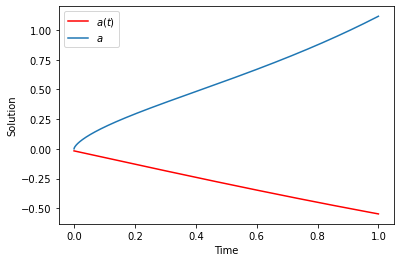

-0.54832286


In [43]:
# Version 1
model = NN()
t_tensor = tf.convert_to_tensor(np.linspace(t_in, t_fi, 1000).reshape(-1, 1), dtype=tf.float32)
#t_tensor = tf.constant(np.linspace(t_in, t_fi, 100).reshape(-1, 1), dtype=tf.float32)
#x_train = tf.convert_to_tensor(np.random.rand(100, 2), dtype=tf.float32)
t0 = tf.constant([[t_in]], dtype=tf.float32)
print(t0)
epochs = 2000
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_fn(t_tensor, model)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.numpy()}')

# Results
u_pred = model(t_tensor).numpy()
t_data = np.linspace(t_in,t_fi,1000).reshape(-1,1)
u1_pred, u2_pred = u_pred[:, 0], u_pred[:, 1]
print(epoch,loss.numpy())
# Plot results
plt.plot(t_data, u1_pred, label='$a(t)$',color ='r')
#plt.plot(t_data, u2_pred, label='$\phi(t)$',color ='b')
plt.plot(uuut,uuuy[:,3],label = r'$a$')
plt.xlabel('Time')
plt.ylabel('Solution')
#plt.ylim(0.9e-8,1.1e-8)
plt.legend()
plt.show()
print(u1_pred[-1])

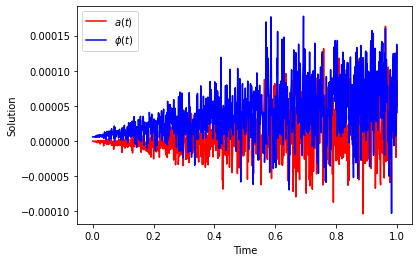

In [14]:
plt.plot(t_data, u1_pred, label='$a(t)$',color ='r')
plt.plot(t_data, u2_pred, label='$\phi(t)$',color ='b')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.legend()
plt.show()

In [ ]:
plt.plot(t_data, u1_pred, label='$a(t)$',color ='r')
plt.plot(t_data, u2_pred, label='$\phi(t)$',color ='b')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.legend()
plt.show()

In [68]:
print(epoch,loss.numpy())

99 [[3.8174458]]


In [63]:
u1_pred[-1]

0.72091013

In [46]:
#u2_pred

Epoch: 0, Loss: [[8.373887]]
Epoch: 100, Loss: [[6.8924465]]
Epoch: 200, Loss: [[5.783805]]
Epoch: 300, Loss: [[5.042645]]
Epoch: 400, Loss: [[4.6101565]]
Epoch: 500, Loss: [[4.3174267]]
Epoch: 600, Loss: [[4.0830464]]
Epoch: 700, Loss: [[3.882228]]
Epoch: 800, Loss: [[3.7035952]]
Epoch: 900, Loss: [[3.5400836]]
Epoch: 1000, Loss: [[3.3868918]]
Reached maximum epochs: 1000
1000 [[3.3868918]]


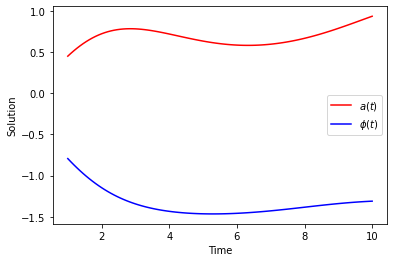

In [16]:
# Version 2
""""model = NN()
t_tensor = tf.convert_to_tensor(np.linspace(t_in, t_fi, 100).reshape(-1, 1), dtype=tf.float32)
t0 = tf.constant([[t_in]], dtype=tf.float32)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
target_loss = 1e-3  # เป้าหมาย loss ที่ต้องการ
epoch = 0
max_epochs = 1000  # กำหนดจำนวน epoch สูงสุดเพื่อป้องกันการฝึกนานเกินไป

# Loop until the loss is smaller than target_loss or until max_epochs is reached
while True:
    with tf.GradientTape() as tape:
        loss = loss_fn(t_tensor, model)
    
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.numpy()}')
    
    # เช็คว่า loss ต่ำกว่าค่าเป้าหมายหรือยัง
    if loss.numpy() < target_loss:
        print(f"Stopping early at epoch {epoch} with loss {loss.numpy()}")
        break
    
    # เช็คว่าเกินจำนวน epoch สูงสุดหรือยัง
    if epoch >= max_epochs:
        print(f"Reached maximum epochs: {epoch}")
        break
    
    epoch += 1

# Results
u_pred = model(t_tensor).numpy()
t_data = np.linspace(t_in, t_fi, 100).reshape(-1, 1)
u1_pred, u2_pred = u_pred[:, 0], u_pred[:, 1]
print(epoch, loss.numpy())

# Plot results
plt.plot(t_data, u1_pred, label='$a(t)$', color='r')
plt.plot(t_data, u2_pred, label='$\phi(t)$', color='b')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.legend()
plt.show()
"""

In [18]:
#type(loss.numpy())
np.ndarray(1)

array([131.92])

[[5.68019e+12]] 10
Epoch: 0, Loss: [[5.68019e+12]], Loss Diff: [[5.68019e+12]]
[[6.564492]] [[5.68019e+12]]
[[6.567559]] [[5.68019e+12]]
[[6.570145]] [[5.68019e+12]]
[[6.572406]] [[5.68019e+12]]
[[6.574416]] [[5.68019e+12]]
[[6.5762205]] [[5.68019e+12]]
[[6.577853]] [[5.68019e+12]]
[[6.579335]] [[5.68019e+12]]
[[6.5806823]] [[5.68019e+12]]
[[6.5819135]] [[5.68019e+12]]
[[6.583037]] [[5.68019e+12]]
[[6.584064]] [[5.68019e+12]]
[[6.585005]] [[5.68019e+12]]
[[6.585865]] [[5.68019e+12]]
[[6.586653]] [[5.68019e+12]]
[[6.587376]] [[5.68019e+12]]
[[6.5880375]] [[5.68019e+12]]
[[6.588643]] [[5.68019e+12]]
[[6.589198]] [[5.68019e+12]]
[[6.5897064]] [[5.68019e+12]]
[[6.590172]] [[5.68019e+12]]
[[6.5905976]] [[5.68019e+12]]
[[6.5909886]] [[5.68019e+12]]
[[6.5913444]] [[5.68019e+12]]
[[6.591671]] [[5.68019e+12]]
[[6.5919695]] [[5.68019e+12]]
[[6.5922422]] [[5.68019e+12]]
[[6.592492]] [[5.68019e+12]]
[[6.59272]] [[5.68019e+12]]
[[6.592927]] [[5.68019e+12]]
[[6.593118]] [[5.68019e+12]]
[[6.593292]] 

[[6.5950246]] [[6.5950403]]
[[6.5950246]] [[6.5950403]]
[[6.5950246]] [[6.5950403]]
[[6.5950246]] [[6.5950403]]
[[6.5950236]] [[6.5950403]]
[[6.5950236]] [[6.5950403]]
[[6.5950236]] [[6.5950403]]
[[6.5950236]] [[6.5950403]]
[[6.5950236]] [[6.5950403]]
[[6.5950236]] [[6.5950403]]
Epoch: 300, Loss: [[6.5950236]], Loss Diff: [[1.66893e-05]]
[[6.5950236]] [[6.5950236]]
[[6.595022]] [[6.5950236]]
[[6.595022]] [[6.5950236]]
[[6.595022]] [[6.5950236]]
[[6.595022]] [[6.5950236]]
[[6.595022]] [[6.5950236]]
[[6.595022]] [[6.5950236]]
[[6.595021]] [[6.5950236]]
[[6.595021]] [[6.5950236]]
[[6.595021]] [[6.5950236]]
[[6.595021]] [[6.5950236]]
[[6.595021]] [[6.5950236]]
[[6.595021]] [[6.5950236]]
[[6.59502]] [[6.5950236]]
[[6.59502]] [[6.5950236]]
[[6.59502]] [[6.5950236]]
[[6.59502]] [[6.5950236]]
[[6.59502]] [[6.5950236]]
[[6.59502]] [[6.5950236]]
[[6.5950184]] [[6.5950236]]
[[6.5950184]] [[6.5950236]]
[[6.5950184]] [[6.5950236]]
[[6.5950184]] [[6.5950236]]
[[6.5950184]] [[6.5950236]]
[[6.5950184]

[[6.5949526]] [[6.594977]]
[[6.5949516]] [[6.594977]]
[[6.5949516]] [[6.594977]]
[[6.5949516]] [[6.594977]]
[[6.5949516]] [[6.594977]]
[[6.59495]] [[6.594977]]
[[6.59495]] [[6.594977]]
[[6.59495]] [[6.594977]]
[[6.59495]] [[6.594977]]
[[6.59495]] [[6.594977]]
[[6.594949]] [[6.594977]]
[[6.594949]] [[6.594977]]
[[6.594949]] [[6.594977]]
[[6.594949]] [[6.594977]]
[[6.594948]] [[6.594977]]
Epoch: 600, Loss: [[6.594948]], Loss Diff: [[2.9087067e-05]]
[[6.594948]] [[6.594948]]
[[6.594948]] [[6.594948]]
[[6.594948]] [[6.594948]]
[[6.5949464]] [[6.594948]]
[[6.5949464]] [[6.594948]]
[[6.5949464]] [[6.594948]]
[[6.5949464]] [[6.594948]]
[[6.5949454]] [[6.594948]]
[[6.5949454]] [[6.594948]]
[[6.5949454]] [[6.594948]]
[[6.5949454]] [[6.594948]]
[[6.594944]] [[6.594948]]
[[6.594944]] [[6.594948]]
[[6.594944]] [[6.594948]]
[[6.594944]] [[6.594948]]
[[6.594943]] [[6.594948]]
[[6.594943]] [[6.594948]]
[[6.594943]] [[6.594948]]
[[6.594943]] [[6.594948]]
[[6.5949416]] [[6.594948]]
[[6.5949416]] [[6.59

[[6.594847]] [[6.59488]]
[[6.594846]] [[6.59488]]
[[6.594846]] [[6.59488]]
[[6.594846]] [[6.59488]]
[[6.594845]] [[6.59488]]
[[6.594845]] [[6.59488]]
[[6.594845]] [[6.59488]]
[[6.5948434]] [[6.59488]]
[[6.5948434]] [[6.59488]]
[[6.5948434]] [[6.59488]]
[[6.5948424]] [[6.59488]]
[[6.5948424]] [[6.59488]]
Epoch: 900, Loss: [[6.5948424]], Loss Diff: [[3.7670135e-05]]
[[6.5948424]] [[6.5948424]]
[[6.594841]] [[6.5948424]]
[[6.594841]] [[6.5948424]]
[[6.594841]] [[6.5948424]]
[[6.59484]] [[6.5948424]]
[[6.59484]] [[6.5948424]]
[[6.59484]] [[6.5948424]]
[[6.5948386]] [[6.5948424]]
[[6.5948386]] [[6.5948424]]
[[6.5948386]] [[6.5948424]]
[[6.594837]] [[6.5948424]]
[[6.594837]] [[6.5948424]]
[[6.594837]] [[6.5948424]]
[[6.594836]] [[6.5948424]]
[[6.594836]] [[6.5948424]]
[[6.594836]] [[6.5948424]]
[[6.594835]] [[6.5948424]]
[[6.594835]] [[6.5948424]]
[[6.594835]] [[6.5948424]]
[[6.594834]] [[6.5948424]]
[[6.594834]] [[6.5948424]]
[[6.594834]] [[6.5948424]]
[[6.5948324]] [[6.5948424]]
[[6.594832

[[6.5947123]] [[6.594755]]
[[6.5947123]] [[6.594755]]
[[6.5947123]] [[6.594755]]
[[6.5947113]] [[6.594755]]
[[6.5947113]] [[6.594755]]
[[6.59471]] [[6.594755]]
[[6.59471]] [[6.594755]]
[[6.59471]] [[6.594755]]
[[6.594709]] [[6.594755]]
[[6.594709]] [[6.594755]]
[[6.5947075]] [[6.594755]]
[[6.5947075]] [[6.594755]]
[[6.5947075]] [[6.594755]]
[[6.594706]] [[6.594755]]
[[6.594706]] [[6.594755]]
Epoch: 1200, Loss: [[6.594706]], Loss Diff: [[4.9114227e-05]]
[[6.594705]] [[6.594706]]
[[6.5947046]] [[6.594706]]
[[6.5947037]] [[6.594706]]
[[6.594703]] [[6.594706]]
[[6.594703]] [[6.594706]]
[[6.5947022]] [[6.594706]]
[[6.5947022]] [[6.594706]]
[[6.594701]] [[6.594706]]
[[6.594701]] [[6.594706]]
[[6.594701]] [[6.594706]]
[[6.5947]] [[6.594706]]
[[6.5947]] [[6.594706]]
[[6.5946984]] [[6.594706]]
[[6.5946984]] [[6.594706]]
[[6.5946975]] [[6.594706]]
[[6.5946975]] [[6.594706]]
[[6.5946975]] [[6.594706]]
[[6.594696]] [[6.594706]]
[[6.594696]] [[6.594706]]
[[6.5946946]] [[6.594706]]
[[6.5946946]] [[6

[[6.594544]] [[6.5945973]]
[[6.594543]] [[6.5945973]]
[[6.594543]] [[6.5945973]]
[[6.5945415]] [[6.5945973]]
[[6.5945415]] [[6.5945973]]
[[6.5945406]] [[6.5945973]]
[[6.5945406]] [[6.5945973]]
[[6.594539]] [[6.5945973]]
[[6.594539]] [[6.5945973]]
[[6.594538]] [[6.5945973]]
[[6.594538]] [[6.5945973]]
[[6.594537]] [[6.5945973]]
[[6.594537]] [[6.5945973]]
Epoch: 1500, Loss: [[6.594537]], Loss Diff: [[6.055832e-05]]
[[6.594536]] [[6.594537]]
[[6.594536]] [[6.594537]]
[[6.5945344]] [[6.594537]]
[[6.5945344]] [[6.594537]]
[[6.594533]] [[6.594537]]
[[6.594533]] [[6.594537]]
[[6.594532]] [[6.594537]]
[[6.594532]] [[6.594537]]
[[6.5945306]] [[6.594537]]
[[6.5945306]] [[6.594537]]
[[6.5945296]] [[6.594537]]
[[6.5945296]] [[6.594537]]
[[6.594528]] [[6.594537]]
[[6.5945272]] [[6.594537]]
[[6.5945272]] [[6.594537]]
[[6.594526]] [[6.594537]]
[[6.594526]] [[6.594537]]
[[6.594525]] [[6.594537]]
[[6.594525]] [[6.594537]]
[[6.5945234]] [[6.594537]]
[[6.5945234]] [[6.594537]]
[[6.594522]] [[6.594537]]
[[

[[6.594343]] [[6.5944033]]
[[6.5943418]] [[6.5944033]]
[[6.5943418]] [[6.5944033]]
[[6.5943403]] [[6.5944033]]
[[6.5943394]] [[6.5944033]]
[[6.5943394]] [[6.5944033]]
[[6.594338]] [[6.5944033]]
[[6.594338]] [[6.5944033]]
[[6.594337]] [[6.5944033]]
[[6.5943356]] [[6.5944033]]
[[6.5943356]] [[6.5944033]]
[[6.5943346]] [[6.5944033]]
[[6.5943346]] [[6.5944033]]
[[6.594333]] [[6.5944033]]
[[6.594332]] [[6.5944033]]
[[6.594332]] [[6.5944033]]
[[6.594331]] [[6.5944033]]
Epoch: 1800, Loss: [[6.594331]], Loss Diff: [[7.247925e-05]]
[[6.5943294]] [[6.594331]]
[[6.5943294]] [[6.594331]]
[[6.5943284]] [[6.594331]]
[[6.5943284]] [[6.594331]]
[[6.594327]] [[6.594331]]
[[6.594326]] [[6.594331]]
[[6.594326]] [[6.594331]]
[[6.5943246]] [[6.594331]]
[[6.5943246]] [[6.594331]]
[[6.5943236]] [[6.594331]]
[[6.594322]] [[6.594331]]
[[6.594322]] [[6.594331]]
[[6.594321]] [[6.594331]]
[[6.59432]] [[6.594331]]
[[6.59432]] [[6.594331]]
[[6.5943184]] [[6.594331]]
[[6.5943184]] [[6.594331]]
[[6.5943174]] [[6.5943

[[6.5941005]] [[6.5941715]]
[[6.594099]] [[6.5941715]]
[[6.594098]] [[6.5941715]]
[[6.594098]] [[6.5941715]]
[[6.5940967]] [[6.5941715]]
[[6.594095]] [[6.5941715]]
[[6.5940943]] [[6.5941715]]
[[6.5940943]] [[6.5941715]]
[[6.594093]] [[6.5941715]]
[[6.594092]] [[6.5941715]]
[[6.594092]] [[6.5941715]]
[[6.5940905]] [[6.5941715]]
[[6.5940895]] [[6.5941715]]
[[6.594088]] [[6.5941715]]
[[6.594088]] [[6.5941715]]
[[6.5940866]] [[6.5941715]]
[[6.5940857]] [[6.5941715]]
[[6.5940857]] [[6.5941715]]
Epoch: 2100, Loss: [[6.5940857]], Loss Diff: [[8.583069e-05]]
[[6.5940843]] [[6.5940857]]
[[6.5940833]] [[6.5940857]]
[[6.594082]] [[6.5940857]]
[[6.594082]] [[6.5940857]]
[[6.594081]] [[6.5940857]]
[[6.5940795]] [[6.5940857]]
[[6.5940785]] [[6.5940857]]
[[6.5940785]] [[6.5940857]]
[[6.594077]] [[6.5940857]]
[[6.5940757]] [[6.5940857]]
[[6.5940747]] [[6.5940857]]
[[6.5940747]] [[6.5940857]]
[[6.5940733]] [[6.5940857]]
[[6.5940723]] [[6.5940857]]
[[6.5940723]] [[6.5940857]]
[[6.594071]] [[6.5940857]]


[[6.5938187]] [[6.5938954]]
[[6.593817]] [[6.5938954]]
[[6.5938163]] [[6.5938954]]
[[6.593815]] [[6.5938954]]
[[6.593815]] [[6.5938954]]
[[6.593814]] [[6.5938954]]
[[6.5938125]] [[6.5938954]]
[[6.593811]] [[6.5938954]]
[[6.59381]] [[6.5938954]]
[[6.5938087]] [[6.5938954]]
[[6.5938087]] [[6.5938954]]
[[6.5938077]] [[6.5938954]]
[[6.5938063]] [[6.5938954]]
[[6.5938053]] [[6.5938954]]
[[6.593804]] [[6.5938954]]
[[6.5938025]] [[6.5938954]]
[[6.5938015]] [[6.5938954]]
[[6.5938015]] [[6.5938954]]
[[6.5938]] [[6.5938954]]
[[6.593799]] [[6.5938954]]
[[6.5937977]] [[6.5938954]]
[[6.5937963]] [[6.5938954]]
[[6.593795]] [[6.5938954]]
[[6.593794]] [[6.5938954]]
[[6.593794]] [[6.5938954]]
Epoch: 2400, Loss: [[6.593794]], Loss Diff: [[0.00010157]]
[[6.5937924]] [[6.593794]]
[[6.593791]] [[6.593794]]
[[6.59379]] [[6.593794]]
[[6.5937886]] [[6.593794]]
[[6.5937877]] [[6.593794]]
[[6.5937862]] [[6.593794]]
[[6.5937853]] [[6.593794]]
[[6.5937853]] [[6.593794]]
[[6.593784]] [[6.593794]]
[[6.593783]] [[6.

[[6.5934763]] [[6.5935698]]
[[6.5934753]] [[6.5935698]]
[[6.593474]] [[6.5935698]]
[[6.593473]] [[6.5935698]]
[[6.5934715]] [[6.5935698]]
[[6.5934706]] [[6.5935698]]
[[6.593469]] [[6.5935698]]
[[6.593468]] [[6.5935698]]
[[6.5934668]] [[6.5935698]]
[[6.5934653]] [[6.5935698]]
[[6.5934644]] [[6.5935698]]
[[6.593463]] [[6.5935698]]
[[6.593462]] [[6.5935698]]
[[6.5934606]] [[6.5935698]]
[[6.5934596]] [[6.5935698]]
[[6.593458]] [[6.5935698]]
[[6.593457]] [[6.5935698]]
[[6.5934553]] [[6.5935698]]
[[6.593454]] [[6.5935698]]
[[6.593453]] [[6.5935698]]
[[6.5934515]] [[6.5935698]]
[[6.5934505]] [[6.5935698]]
[[6.593449]] [[6.5935698]]
Epoch: 2700, Loss: [[6.593449]], Loss Diff: [[0.00012064]]
[[6.593448]] [[6.593449]]
[[6.5934467]] [[6.593449]]
[[6.5934453]] [[6.593449]]
[[6.5934443]] [[6.593449]]
[[6.593443]] [[6.593449]]
[[6.593442]] [[6.593449]]
[[6.5934405]] [[6.593449]]
[[6.5934396]] [[6.593449]]
[[6.593438]] [[6.593449]]
[[6.593437]] [[6.593449]]
[[6.593436]] [[6.593449]]
[[6.5934343]] [[6

[[6.593073]] [[6.593187]]
[[6.5930705]] [[6.593187]]
[[6.5930696]] [[6.593187]]
[[6.593068]] [[6.593187]]
[[6.5930667]] [[6.593187]]
[[6.5930657]] [[6.593187]]
[[6.5930634]] [[6.593187]]
[[6.593062]] [[6.593187]]
[[6.593061]] [[6.593187]]
[[6.5930595]] [[6.593187]]
[[6.593058]] [[6.593187]]
[[6.593057]] [[6.593187]]
[[6.593055]] [[6.593187]]
[[6.5930533]] [[6.593187]]
[[6.5930524]] [[6.593187]]
[[6.593051]] [[6.593187]]
[[6.59305]] [[6.593187]]
[[6.593047]] [[6.593187]]
[[6.593046]] [[6.593187]]
[[6.5930448]] [[6.593187]]
Epoch: 3000, Loss: [[6.5930448]], Loss Diff: [[0.0001421]]
[[6.593044]] [[6.5930448]]
[[6.5930424]] [[6.5930448]]
[[6.5930414]] [[6.5930448]]
[[6.593039]] [[6.5930448]]
[[6.5930376]] [[6.5930448]]
[[6.593036]] [[6.5930448]]
[[6.593035]] [[6.5930448]]
[[6.593034]] [[6.5930448]]
[[6.5930314]] [[6.5930448]]
[[6.5930305]] [[6.5930448]]
[[6.593029]] [[6.5930448]]
[[6.5930276]] [[6.5930448]]
[[6.5930266]] [[6.5930448]]
[[6.5930243]] [[6.5930448]]
[[6.593023]] [[6.5930448]]


[[6.592611]] [[6.592737]]
[[6.5926085]] [[6.592737]]
[[6.592607]] [[6.592737]]
[[6.592606]] [[6.592737]]
[[6.5926037]] [[6.592737]]
[[6.5926023]] [[6.592737]]
[[6.5926013]] [[6.592737]]
[[6.5925984]] [[6.592737]]
[[6.5925975]] [[6.592737]]
[[6.592595]] [[6.592737]]
[[6.5925937]] [[6.592737]]
[[6.5925927]] [[6.592737]]
[[6.5925903]] [[6.592737]]
[[6.592589]] [[6.592737]]
[[6.5925865]] [[6.592737]]
[[6.592585]] [[6.592737]]
[[6.592584]] [[6.592737]]
[[6.5925817]] [[6.592737]]
[[6.5925803]] [[6.592737]]
[[6.592579]] [[6.592737]]
[[6.5925765]] [[6.592737]]
[[6.5925756]] [[6.592737]]
[[6.592573]] [[6.592737]]
[[6.5925717]] [[6.592737]]
Epoch: 3300, Loss: [[6.5925717]], Loss Diff: [[0.00016546]]
[[6.592571]] [[6.5925717]]
[[6.592568]] [[6.5925717]]
[[6.592567]] [[6.5925717]]
[[6.5925646]] [[6.5925717]]
[[6.592563]] [[6.5925717]]
[[6.592562]] [[6.5925717]]
[[6.59256]] [[6.5925717]]
[[6.5925584]] [[6.5925717]]
[[6.592556]] [[6.5925717]]
[[6.5925546]] [[6.5925717]]
[[6.5925536]] [[6.5925717]]
[

[[6.592074]] [[6.5922127]]
[[6.5920715]] [[6.5922127]]
[[6.59207]] [[6.5922127]]
[[6.5920677]] [[6.5922127]]
[[6.5920653]] [[6.5922127]]
[[6.592064]] [[6.5922127]]
[[6.5920615]] [[6.5922127]]
[[6.5920606]] [[6.5922127]]
[[6.592058]] [[6.5922127]]
[[6.5920553]] [[6.5922127]]
[[6.5920544]] [[6.5922127]]
[[6.592052]] [[6.5922127]]
[[6.5920506]] [[6.5922127]]
[[6.592048]] [[6.5922127]]
[[6.592046]] [[6.5922127]]
[[6.5920444]] [[6.5922127]]
[[6.592042]] [[6.5922127]]
[[6.592041]] [[6.5922127]]
[[6.5920386]] [[6.5922127]]
[[6.592036]] [[6.5922127]]
[[6.592035]] [[6.5922127]]
[[6.5920324]] [[6.5922127]]
[[6.592031]] [[6.5922127]]
[[6.5920286]] [[6.5922127]]
[[6.592026]] [[6.5922127]]
[[6.592025]] [[6.5922127]]
[[6.5920224]] [[6.5922127]]
[[6.59202]] [[6.5922127]]
[[6.592019]] [[6.5922127]]
Epoch: 3600, Loss: [[6.592019]], Loss Diff: [[0.0001936]]
[[6.592016]] [[6.592019]]
[[6.5920153]] [[6.592019]]
[[6.592013]] [[6.592019]]
[[6.5920105]] [[6.592019]]
[[6.592009]] [[6.592019]]
[[6.5920067]] [[

[[6.591438]] [[6.5915995]]
[[6.5914354]] [[6.5915995]]
[[6.591433]] [[6.5915995]]
[[6.5914307]] [[6.5915995]]
[[6.5914283]] [[6.5915995]]
[[6.591427]] [[6.5915995]]
[[6.5914245]] [[6.5915995]]
[[6.591422]] [[6.5915995]]
[[6.5914197]] [[6.5915995]]
[[6.5914173]] [[6.5915995]]
[[6.591415]] [[6.5915995]]
[[6.591412]] [[6.5915995]]
[[6.5914097]] [[6.5915995]]
[[6.5914087]] [[6.5915995]]
[[6.5914063]] [[6.5915995]]
[[6.591404]] [[6.5915995]]
[[6.591401]] [[6.5915995]]
[[6.5913987]] [[6.5915995]]
[[6.591396]] [[6.5915995]]
[[6.5913935]] [[6.5915995]]
[[6.591391]] [[6.5915995]]
[[6.5913897]] [[6.5915995]]
[[6.5913873]] [[6.5915995]]
[[6.591385]] [[6.5915995]]
[[6.5913825]] [[6.5915995]]
[[6.59138]] [[6.5915995]]
[[6.5913777]] [[6.5915995]]
[[6.5913754]] [[6.5915995]]
[[6.591373]] [[6.5915995]]
Epoch: 3900, Loss: [[6.591373]], Loss Diff: [[0.0002265]]
[[6.59137]] [[6.591373]]
[[6.591369]] [[6.591373]]
[[6.591367]] [[6.591373]]
[[6.5913644]] [[6.591373]]
[[6.591362]] [[6.591373]]
[[6.591359]] [

[[6.5906887]] [[6.590885]]
[[6.5906854]] [[6.590885]]
[[6.5906825]] [[6.590885]]
[[6.59068]] [[6.590885]]
[[6.5906777]] [[6.590885]]
[[6.5906754]] [[6.590885]]
[[6.5906715]] [[6.590885]]
[[6.590669]] [[6.590885]]
[[6.590667]] [[6.590885]]
[[6.5906644]] [[6.590885]]
[[6.590662]] [[6.590885]]
[[6.5906596]] [[6.590885]]
[[6.590656]] [[6.590885]]
[[6.5906534]] [[6.590885]]
[[6.590651]] [[6.590885]]
[[6.5906487]] [[6.590885]]
[[6.5906463]] [[6.590885]]
[[6.5906425]] [[6.590885]]
[[6.59064]] [[6.590885]]
[[6.5906377]] [[6.590885]]
[[6.5906353]] [[6.590885]]
[[6.590633]] [[6.590885]]
[[6.590629]] [[6.590885]]
[[6.5906267]] [[6.590885]]
[[6.5906243]] [[6.590885]]
[[6.5906215]] [[6.590885]]
Epoch: 4200, Loss: [[6.5906215]], Loss Diff: [[0.00026369]]
[[6.590619]] [[6.5906215]]
[[6.5906157]] [[6.5906215]]
[[6.5906134]] [[6.5906215]]
[[6.5906105]] [[6.5906215]]
[[6.590608]] [[6.5906215]]
[[6.5906057]] [[6.5906215]]
[[6.5906024]] [[6.5906215]]
[[6.5905995]] [[6.5906215]]
[[6.590597]] [[6.5906215]]


[[6.589836]] [[6.590053]]
[[6.5898337]] [[6.590053]]
[[6.58983]] [[6.590053]]
[[6.5898275]] [[6.590053]]
[[6.5898237]] [[6.590053]]
[[6.5898213]] [[6.590053]]
[[6.5898175]] [[6.590053]]
[[6.589814]] [[6.590053]]
[[6.589812]] [[6.590053]]
[[6.589808]] [[6.590053]]
[[6.5898056]] [[6.590053]]
[[6.589802]] [[6.590053]]
[[6.5897994]] [[6.590053]]
[[6.5897956]] [[6.590053]]
[[6.589793]] [[6.590053]]
[[6.58979]] [[6.590053]]
[[6.589787]] [[6.590053]]
[[6.5897837]] [[6.590053]]
[[6.5897794]] [[6.590053]]
[[6.589777]] [[6.590053]]
[[6.589773]] [[6.590053]]
[[6.589771]] [[6.590053]]
[[6.589767]] [[6.590053]]
[[6.5897646]] [[6.590053]]
[[6.5897613]] [[6.590053]]
[[6.589759]] [[6.590053]]
[[6.589755]] [[6.590053]]
[[6.5897512]] [[6.590053]]
[[6.589749]] [[6.590053]]
[[6.589745]] [[6.590053]]
Epoch: 4500, Loss: [[6.589745]], Loss Diff: [[0.00030804]]
[[6.5897427]] [[6.589745]]
[[6.5897393]] [[6.589745]]
[[6.589737]] [[6.589745]]
[[6.589733]] [[6.589745]]
[[6.5897293]] [[6.589745]]
[[6.589727]] [[6.

[[6.5888324]] [[6.589083]]
[[6.5888286]] [[6.589083]]
[[6.5888247]] [[6.589083]]
[[6.5888214]] [[6.589083]]
[[6.5888176]] [[6.589083]]
[[6.588814]] [[6.589083]]
[[6.5888104]] [[6.589083]]
[[6.5888066]] [[6.589083]]
[[6.588803]] [[6.589083]]
[[6.5887995]] [[6.589083]]
[[6.5887957]] [[6.589083]]
[[6.588792]] [[6.589083]]
[[6.5887885]] [[6.589083]]
[[6.5887847]] [[6.589083]]
[[6.588781]] [[6.589083]]
[[6.5887775]] [[6.589083]]
[[6.5887747]] [[6.589083]]
[[6.5887713]] [[6.589083]]
[[6.5887675]] [[6.589083]]
[[6.5887637]] [[6.589083]]
[[6.5887604]] [[6.589083]]
[[6.5887566]] [[6.589083]]
[[6.5887527]] [[6.589083]]
[[6.5887494]] [[6.589083]]
[[6.5887456]] [[6.589083]]
[[6.588742]] [[6.589083]]
[[6.5887384]] [[6.589083]]
[[6.588734]] [[6.589083]]
[[6.5887303]] [[6.589083]]
[[6.588727]] [[6.589083]]
Epoch: 4800, Loss: [[6.588727]], Loss Diff: [[0.0003562]]
[[6.588723]] [[6.588727]]
[[6.5887194]] [[6.588727]]
[[6.588716]] [[6.588727]]
[[6.588712]] [[6.588727]]
[[6.5887084]] [[6.588727]]
[[6.588

[[6.5876765]] [[6.5879564]]
[[6.5876718]] [[6.5879564]]
[[6.5876684]] [[6.5879564]]
[[6.5876646]] [[6.5879564]]
[[6.58766]] [[6.5879564]]
[[6.587656]] [[6.5879564]]
[[6.5876513]] [[6.5879564]]
[[6.5876474]] [[6.5879564]]
[[6.5876427]] [[6.5879564]]
[[6.587639]] [[6.5879564]]
[[6.587635]] [[6.5879564]]
[[6.5876303]] [[6.5879564]]
[[6.587627]] [[6.5879564]]
[[6.5876217]] [[6.5879564]]
[[6.5876184]] [[6.5879564]]
[[6.587613]] [[6.5879564]]
[[6.58761]] [[6.5879564]]
[[6.587606]] [[6.5879564]]
[[6.587601]] [[6.5879564]]
[[6.5875974]] [[6.5879564]]
[[6.5875926]] [[6.5879564]]
[[6.587589]] [[6.5879564]]
[[6.587584]] [[6.5879564]]
[[6.58758]] [[6.5879564]]
[[6.5875754]] [[6.5879564]]
[[6.5875716]] [[6.5879564]]
[[6.5875664]] [[6.5879564]]
[[6.5875626]] [[6.5879564]]
[[6.587558]] [[6.5879564]]
[[6.5875545]] [[6.5879564]]
[[6.5875506]] [[6.5879564]]
[[6.587546]] [[6.5879564]]
[[6.587542]] [[6.5879564]]
Epoch: 5100, Loss: [[6.587542]], Loss Diff: [[0.00041437]]
[[6.5875373]] [[6.587542]]
[[6.5875

[[6.5863156]] [[6.5866466]]
[[6.586311]] [[6.5866466]]
[[6.586306]] [[6.5866466]]
[[6.5863013]] [[6.5866466]]
[[6.5862966]] [[6.5866466]]
[[6.5862913]] [[6.5866466]]
[[6.5862865]] [[6.5866466]]
[[6.586282]] [[6.5866466]]
[[6.586277]] [[6.5866466]]
[[6.5862713]] [[6.5866466]]
[[6.5862665]] [[6.5866466]]
[[6.5862617]] [[6.5866466]]
[[6.586257]] [[6.5866466]]
[[6.5862517]] [[6.5866466]]
[[6.586247]] [[6.5866466]]
[[6.586242]] [[6.5866466]]
[[6.5862374]] [[6.5866466]]
[[6.586232]] [[6.5866466]]
[[6.5862274]] [[6.5866466]]
[[6.5862226]] [[6.5866466]]
[[6.586218]] [[6.5866466]]
[[6.586213]] [[6.5866466]]
[[6.586208]] [[6.5866466]]
[[6.586203]] [[6.5866466]]
[[6.5861983]] [[6.5866466]]
[[6.5861936]] [[6.5866466]]
[[6.5861883]] [[6.5866466]]
[[6.5861835]] [[6.5866466]]
[[6.586179]] [[6.5866466]]
[[6.586174]] [[6.5866466]]
[[6.586169]] [[6.5866466]]
[[6.586164]] [[6.5866466]]
Epoch: 5400, Loss: [[6.586164]], Loss Diff: [[0.00048256]]
[[6.586159]] [[6.586164]]
[[6.586154]] [[6.586164]]
[[6.58614

[[6.5847673]] [[6.5851226]]
[[6.5847616]] [[6.5851226]]
[[6.5847564]] [[6.5851226]]
[[6.5847507]] [[6.5851226]]
[[6.5847445]] [[6.5851226]]
[[6.5847397]] [[6.5851226]]
[[6.584733]] [[6.5851226]]
[[6.5847282]] [[6.5851226]]
[[6.584722]] [[6.5851226]]
[[6.584716]] [[6.5851226]]
[[6.584711]] [[6.5851226]]
[[6.584705]] [[6.5851226]]
[[6.5846987]] [[6.5851226]]
[[6.584694]] [[6.5851226]]
[[6.5846877]] [[6.5851226]]
[[6.5846815]] [[6.5851226]]
[[6.5846767]] [[6.5851226]]
[[6.5846705]] [[6.5851226]]
[[6.584666]] [[6.5851226]]
[[6.5846596]] [[6.5851226]]
[[6.5846534]] [[6.5851226]]
[[6.5846486]] [[6.5851226]]
[[6.5846424]] [[6.5851226]]
[[6.5846367]] [[6.5851226]]
[[6.5846314]] [[6.5851226]]
[[6.5846257]] [[6.5851226]]
[[6.5846195]] [[6.5851226]]
[[6.5846143]] [[6.5851226]]
[[6.584608]] [[6.5851226]]
[[6.584602]] [[6.5851226]]
[[6.584597]] [[6.5851226]]
[[6.584591]] [[6.5851226]]
[[6.5845847]] [[6.5851226]]
[[6.5845785]] [[6.5851226]]
[[6.5845737]] [[6.5851226]]
[[6.5845675]] [[6.5851226]]
[[6

[[6.5829463]] [[6.583353]]
[[6.5829387]] [[6.583353]]
[[6.5829325]] [[6.583353]]
[[6.5829263]] [[6.583353]]
[[6.582919]] [[6.583353]]
[[6.582913]] [[6.583353]]
[[6.5829067]] [[6.583353]]
[[6.5828996]] [[6.583353]]
[[6.5828934]] [[6.583353]]
[[6.582886]] [[6.583353]]
[[6.58288]] [[6.583353]]
[[6.582874]] [[6.583353]]
[[6.5828667]] [[6.583353]]
[[6.5828605]] [[6.583353]]
[[6.5828533]] [[6.583353]]
[[6.582847]] [[6.583353]]
[[6.582841]] [[6.583353]]
[[6.582834]] [[6.583353]]
[[6.5828276]] [[6.583353]]
[[6.58282]] [[6.583353]]
[[6.5828137]] [[6.583353]]
[[6.5828075]] [[6.583353]]
[[6.5828004]] [[6.583353]]
[[6.582794]] [[6.583353]]
[[6.582787]] [[6.583353]]
[[6.582781]] [[6.583353]]
[[6.5827746]] [[6.583353]]
[[6.5827675]] [[6.583353]]
[[6.5827613]] [[6.583353]]
[[6.582754]] [[6.583353]]
[[6.582748]] [[6.583353]]
[[6.5827403]] [[6.583353]]
[[6.5827346]] [[6.583353]]
[[6.5827284]] [[6.583353]]
[[6.582721]] [[6.583353]]
[[6.582715]] [[6.583353]]
[[6.5827074]] [[6.583353]]
[[6.582701]] [[6.58

[[6.5808387]] [[6.5812955]]
[[6.58083]] [[6.5812955]]
[[6.580823]] [[6.5812955]]
[[6.5808153]] [[6.5812955]]
[[6.580808]] [[6.5812955]]
[[6.5807996]] [[6.5812955]]
[[6.5807924]] [[6.5812955]]
[[6.580785]] [[6.5812955]]
[[6.5807776]] [[6.5812955]]
[[6.5807686]] [[6.5812955]]
[[6.5807614]] [[6.5812955]]
[[6.5807543]] [[6.5812955]]
[[6.5807467]] [[6.5812955]]
[[6.580738]] [[6.5812955]]
[[6.580731]] [[6.5812955]]
[[6.580724]] [[6.5812955]]
[[6.580716]] [[6.5812955]]
[[6.5807076]] [[6.5812955]]
[[6.5807004]] [[6.5812955]]
[[6.5806932]] [[6.5812955]]
[[6.5806856]] [[6.5812955]]
[[6.580677]] [[6.5812955]]
[[6.58067]] [[6.5812955]]
[[6.5806627]] [[6.5812955]]
[[6.580654]] [[6.5812955]]
[[6.580646]] [[6.5812955]]
[[6.580639]] [[6.5812955]]
[[6.5806317]] [[6.5812955]]
[[6.580623]] [[6.5812955]]
[[6.580616]] [[6.5812955]]
[[6.5806084]] [[6.5812955]]
[[6.5806]] [[6.5812955]]
[[6.5805926]] [[6.5812955]]
[[6.5805855]] [[6.5812955]]
[[6.580577]] [[6.5812955]]
[[6.5805693]] [[6.5812955]]
[[6.580562]] 

[[6.5784097]] [[6.5789056]]
[[6.578401]] [[6.5789056]]
[[6.5783925]] [[6.5789056]]
[[6.578383]] [[6.5789056]]
[[6.5783744]] [[6.5789056]]
[[6.578366]] [[6.5789056]]
[[6.578357]] [[6.5789056]]
[[6.5783477]] [[6.5789056]]
[[6.578339]] [[6.5789056]]
[[6.57833]] [[6.5789056]]
[[6.5783215]] [[6.5789056]]
[[6.5783114]] [[6.5789056]]
[[6.5783033]] [[6.5789056]]
[[6.5782948]] [[6.5789056]]
[[6.578286]] [[6.5789056]]
[[6.578276]] [[6.5789056]]
[[6.5782676]] [[6.5789056]]
[[6.578259]] [[6.5789056]]
[[6.578251]] [[6.5789056]]
[[6.578241]] [[6.5789056]]
[[6.5782323]] [[6.5789056]]
[[6.5782237]] [[6.5789056]]
[[6.578214]] [[6.5789056]]
[[6.578205]] [[6.5789056]]
[[6.5781965]] [[6.5789056]]
[[6.578188]] [[6.5789056]]
[[6.5781784]] [[6.5789056]]
[[6.57817]] [[6.5789056]]
[[6.5781612]] [[6.5789056]]
[[6.578151]] [[6.5789056]]
[[6.578143]] [[6.5789056]]
[[6.5781345]] [[6.5789056]]
[[6.5781245]] [[6.5789056]]
[[6.578116]] [[6.5789056]]
[[6.5781074]] [[6.5789056]]
[[6.578098]] [[6.5789056]]
[[6.578089]] 

[[6.5755224]] [[6.5761294]]
[[6.575513]] [[6.5761294]]
[[6.575503]] [[6.5761294]]
[[6.575492]] [[6.5761294]]
[[6.575482]] [[6.5761294]]
[[6.575471]] [[6.5761294]]
[[6.575461]] [[6.5761294]]
[[6.5754514]] [[6.5761294]]
[[6.5754404]] [[6.5761294]]
[[6.5754304]] [[6.5761294]]
[[6.5754194]] [[6.5761294]]
[[6.57541]] [[6.5761294]]
[[6.5754]] [[6.5761294]]
[[6.575389]] [[6.5761294]]
[[6.5753794]] [[6.5761294]]
[[6.5753684]] [[6.5761294]]
[[6.5753584]] [[6.5761294]]
[[6.5753474]] [[6.5761294]]
[[6.5753374]] [[6.5761294]]
[[6.5753264]] [[6.5761294]]
[[6.575317]] [[6.5761294]]
[[6.575306]] [[6.5761294]]
[[6.575296]] [[6.5761294]]
[[6.575285]] [[6.5761294]]
[[6.5752754]] [[6.5761294]]
[[6.5752645]] [[6.5761294]]
[[6.5752544]] [[6.5761294]]
[[6.5752435]] [[6.5761294]]
[[6.575234]] [[6.5761294]]
[[6.5752225]] [[6.5761294]]
[[6.5752125]] [[6.5761294]]
[[6.5752015]] [[6.5761294]]
[[6.575192]] [[6.5761294]]
[[6.575181]] [[6.5761294]]
[[6.575171]] [[6.5761294]]
[[6.57516]] [[6.5761294]]
[[6.5751505]] 

[[6.5722127]] [[6.5729065]]
[[6.5722013]] [[6.5729065]]
[[6.5721893]] [[6.5729065]]
[[6.572177]] [[6.5729065]]
[[6.572165]] [[6.5729065]]
[[6.572154]] [[6.5729065]]
[[6.5721416]] [[6.5729065]]
[[6.5721292]] [[6.5729065]]
[[6.5721173]] [[6.5729065]]
[[6.5721064]] [[6.5729065]]
[[6.572094]] [[6.5729065]]
[[6.5720816]] [[6.5729065]]
[[6.572069]] [[6.5729065]]
[[6.5720572]] [[6.5729065]]
[[6.5720463]] [[6.5729065]]
[[6.572034]] [[6.5729065]]
[[6.5720215]] [[6.5729065]]
[[6.5720096]] [[6.5729065]]
[[6.571997]] [[6.5729065]]
[[6.571986]] [[6.5729065]]
[[6.5719743]] [[6.5729065]]
[[6.571962]] [[6.5729065]]
[[6.5719495]] [[6.5729065]]
[[6.571937]] [[6.5729065]]
[[6.571925]] [[6.5729065]]
[[6.571913]] [[6.5729065]]
[[6.571902]] [[6.5729065]]
[[6.5718894]] [[6.5729065]]
[[6.5718775]] [[6.5729065]]
[[6.571865]] [[6.5729065]]
[[6.571853]] [[6.5729065]]
[[6.571841]] [[6.5729065]]
[[6.571829]] [[6.5729065]]
[[6.571816]] [[6.5729065]]
[[6.571805]] [[6.5729065]]
[[6.571793]] [[6.5729065]]
[[6.5717807]

[[6.5683856]] [[6.569162]]
[[6.568372]] [[6.569162]]
[[6.5683584]] [[6.569162]]
[[6.5683436]] [[6.569162]]
[[6.5683303]] [[6.569162]]
[[6.5683165]] [[6.569162]]
[[6.568302]] [[6.569162]]
[[6.568289]] [[6.569162]]
[[6.5682755]] [[6.569162]]
[[6.5682607]] [[6.569162]]
[[6.5682473]] [[6.569162]]
[[6.568234]] [[6.569162]]
[[6.5682187]] [[6.569162]]
[[6.5682054]] [[6.569162]]
[[6.568192]] [[6.569162]]
[[6.568177]] [[6.569162]]
[[6.568164]] [[6.569162]]
[[6.568149]] [[6.569162]]
[[6.5681357]] [[6.569162]]
[[6.5681224]] [[6.569162]]
[[6.568108]] [[6.569162]]
[[6.568094]] [[6.569162]]
[[6.5680795]] [[6.569162]]
[[6.568066]] [[6.569162]]
[[6.568053]] [[6.569162]]
[[6.568038]] [[6.569162]]
[[6.5680246]] [[6.569162]]
[[6.56801]] [[6.569162]]
[[6.5679965]] [[6.569162]]
[[6.5679817]] [[6.569162]]
[[6.5679684]] [[6.569162]]
[[6.5679536]] [[6.569162]]
[[6.5679398]] [[6.569162]]
[[6.5679255]] [[6.569162]]
[[6.567912]] [[6.569162]]
[[6.5678973]] [[6.569162]]
[[6.567884]] [[6.569162]]
[[6.567869]] [[6.5

[[6.563882]] [[6.5648165]]
[[6.563866]] [[6.5648165]]
[[6.5638504]] [[6.5648165]]
[[6.563834]] [[6.5648165]]
[[6.5638185]] [[6.5648165]]
[[6.563802]] [[6.5648165]]
[[6.5637856]] [[6.5648165]]
[[6.56377]] [[6.5648165]]
[[6.563754]] [[6.5648165]]
[[6.563738]] [[6.5648165]]
[[6.5637217]] [[6.5648165]]
[[6.563705]] [[6.5648165]]
[[6.5636888]] [[6.5648165]]
[[6.563673]] [[6.5648165]]
[[6.5636573]] [[6.5648165]]
[[6.56364]] [[6.5648165]]
[[6.5636244]] [[6.5648165]]
[[6.563608]] [[6.5648165]]
[[6.5635924]] [[6.5648165]]
[[6.5635753]] [[6.5648165]]
[[6.5635595]] [[6.5648165]]
[[6.563544]] [[6.5648165]]
[[6.5635276]] [[6.5648165]]
[[6.563511]] [[6.5648165]]
[[6.5634947]] [[6.5648165]]
[[6.5634785]] [[6.5648165]]
[[6.5634613]] [[6.5648165]]
[[6.5634456]] [[6.5648165]]
[[6.56343]] [[6.5648165]]
[[6.5634127]] [[6.5648165]]
[[6.563397]] [[6.5648165]]
[[6.563381]] [[6.5648165]]
[[6.563364]] [[6.5648165]]
[[6.563348]] [[6.5648165]]
[[6.563332]] [[6.5648165]]
[[6.563315]] [[6.5648165]]
[[6.563299]] [[

[[6.5586324]] [[6.5597706]]
[[6.558613]] [[6.5597706]]
[[6.5585938]] [[6.5597706]]
[[6.5585756]] [[6.5597706]]
[[6.558556]] [[6.5597706]]
[[6.558538]] [[6.5597706]]
[[6.55852]] [[6.5597706]]
[[6.5585003]] [[6.5597706]]
[[6.558482]] [[6.5597706]]
[[6.558463]] [[6.5597706]]
[[6.5584435]] [[6.5597706]]
[[6.5584254]] [[6.5597706]]
[[6.5584073]] [[6.5597706]]
[[6.5583878]] [[6.5597706]]
[[6.5583696]] [[6.5597706]]
[[6.558351]] [[6.5597706]]
[[6.558331]] [[6.5597706]]
[[6.558313]] [[6.5597706]]
[[6.5582933]] [[6.5597706]]
[[6.558275]] [[6.5597706]]
[[6.5582557]] [[6.5597706]]
[[6.5582376]] [[6.5597706]]
[[6.5582194]] [[6.5597706]]
[[6.5581994]] [[6.5597706]]
[[6.558181]] [[6.5597706]]
[[6.5581617]] [[6.5597706]]
[[6.558143]] [[6.5597706]]
[[6.5581236]] [[6.5597706]]
[[6.5581055]] [[6.5597706]]
[[6.558086]] [[6.5597706]]
[[6.558068]] [[6.5597706]]
[[6.558048]] [[6.5597706]]
[[6.5580297]] [[6.5597706]]
[[6.55801]] [[6.5597706]]
[[6.557992]] [[6.5597706]]
[[6.5579724]] [[6.5597706]]
[[6.557954]

[[6.5526156]] [[6.553916]]
[[6.552593]] [[6.553916]]
[[6.5525723]] [[6.553916]]
[[6.5525503]] [[6.553916]]
[[6.5525284]] [[6.553916]]
[[6.5525064]] [[6.553916]]
[[6.552486]] [[6.553916]]
[[6.552464]] [[6.553916]]
[[6.5524416]] [[6.553916]]
[[6.5524197]] [[6.553916]]
[[6.5523977]] [[6.553916]]
[[6.552377]] [[6.553916]]
[[6.5523553]] [[6.553916]]
[[6.5523334]] [[6.553916]]
[[6.552311]] [[6.553916]]
[[6.552289]] [[6.553916]]
[[6.552267]] [[6.553916]]
[[6.5522466]] [[6.553916]]
[[6.5522246]] [[6.553916]]
[[6.5522027]] [[6.553916]]
[[6.552181]] [[6.553916]]
[[6.5521584]] [[6.553916]]
[[6.5521364]] [[6.553916]]
[[6.5521145]] [[6.553916]]
[[6.5520926]] [[6.553916]]
[[6.5520706]] [[6.553916]]
[[6.5520487]] [[6.553916]]
[[6.5520263]] [[6.553916]]
[[6.5520043]] [[6.553916]]
[[6.551983]] [[6.553916]]
[[6.551961]] [[6.553916]]
[[6.551939]] [[6.553916]]
[[6.551917]] [[6.553916]]
[[6.551895]] [[6.553916]]
[[6.5518727]] [[6.553916]]
[[6.551851]] [[6.553916]]
[[6.551829]] [[6.553916]]
[[6.551807]] [[6

[[6.545539]] [[6.5471234]]
[[6.5455136]] [[6.5471234]]
[[6.545488]] [[6.5471234]]
[[6.5454636]] [[6.5471234]]
[[6.545438]] [[6.5471234]]
[[6.5454135]] [[6.5471234]]
[[6.5453877]] [[6.5471234]]
[[6.5453625]] [[6.5471234]]
[[6.545338]] [[6.5471234]]
[[6.5453124]] [[6.5471234]]
[[6.545286]] [[6.5471234]]
[[6.545261]] [[6.5471234]]
[[6.5452366]] [[6.5471234]]
[[6.545211]] [[6.5471234]]
[[6.5451856]] [[6.5471234]]
[[6.5451593]] [[6.5471234]]
[[6.545135]] [[6.5471234]]
[[6.5451097]] [[6.5471234]]
[[6.545084]] [[6.5471234]]
[[6.5450583]] [[6.5471234]]
[[6.545033]] [[6.5471234]]
[[6.545008]] [[6.5471234]]
[[6.5449824]] [[6.5471234]]
[[6.544957]] [[6.5471234]]
[[6.5449314]] [[6.5471234]]
[[6.544906]] [[6.5471234]]
[[6.5448804]] [[6.5471234]]
[[6.5448556]] [[6.5471234]]
[[6.54483]] [[6.5471234]]
[[6.5448046]] [[6.5471234]]
[[6.544779]] [[6.5471234]]
[[6.5447536]] [[6.5471234]]
[[6.544728]] [[6.5471234]]
[[6.544702]] [[6.5471234]]
[[6.5446763]] [[6.5471234]]
[[6.5446506]] [[6.5471234]]
[[6.544625

[[6.5376105]] [[6.5392437]]
[[6.5375814]] [[6.5392437]]
[[6.5375524]] [[6.5392437]]
[[6.5375233]] [[6.5392437]]
[[6.537493]] [[6.5392437]]
[[6.537464]] [[6.5392437]]
[[6.537435]] [[6.5392437]]
[[6.537407]] [[6.5392437]]
[[6.537378]] [[6.5392437]]
[[6.5373487]] [[6.5392437]]
[[6.537319]] [[6.5392437]]
[[6.53729]] [[6.5392437]]
[[6.5372605]] [[6.5392437]]
[[6.5372314]] [[6.5392437]]
[[6.5372024]] [[6.5392437]]
[[6.537173]] [[6.5392437]]
[[6.5371437]] [[6.5392437]]
[[6.5371146]] [[6.5392437]]
[[6.537085]] [[6.5392437]]
[[6.537056]] [[6.5392437]]
[[6.5370264]] [[6.5392437]]
[[6.5369973]] [[6.5392437]]
[[6.536967]] [[6.5392437]]
[[6.5369377]] [[6.5392437]]
[[6.5369086]] [[6.5392437]]
[[6.5368795]] [[6.5392437]]
[[6.5368495]] [[6.5392437]]
[[6.5368204]] [[6.5392437]]
[[6.5367913]] [[6.5392437]]
[[6.536761]] [[6.5392437]]
[[6.5367317]] [[6.5392437]]
[[6.536702]] [[6.5392437]]
[[6.536673]] [[6.5392437]]
[[6.536644]] [[6.5392437]]
[[6.5366135]] [[6.5392437]]
[[6.5365844]] [[6.5392437]]
[[6.5365

[[6.5284495]] [[6.5301075]]
[[6.5284166]] [[6.5301075]]
[[6.5283823]] [[6.5301075]]
[[6.5283494]] [[6.5301075]]
[[6.5283155]] [[6.5301075]]
[[6.528281]] [[6.5301075]]
[[6.528249]] [[6.5301075]]
[[6.528214]] [[6.5301075]]
[[6.52818]] [[6.5301075]]
[[6.528147]] [[6.5301075]]
[[6.5281134]] [[6.5301075]]
[[6.5280795]] [[6.5301075]]
[[6.528046]] [[6.5301075]]
[[6.528012]] [[6.5301075]]
[[6.527978]] [[6.5301075]]
[[6.527944]] [[6.5301075]]
[[6.527911]] [[6.5301075]]
[[6.527877]] [[6.5301075]]
[[6.5278425]] [[6.5301075]]
[[6.5278087]] [[6.5301075]]
[[6.527775]] [[6.5301075]]
[[6.527742]] [[6.5301075]]
[[6.5277076]] [[6.5301075]]
[[6.5276732]] [[6.5301075]]
[[6.5276394]] [[6.5301075]]
[[6.5276055]] [[6.5301075]]
[[6.527571]] [[6.5301075]]
[[6.527537]] [[6.5301075]]
[[6.527503]] [[6.5301075]]
[[6.5274687]] [[6.5301075]]
[[6.527435]] [[6.5301075]]
[[6.527401]] [[6.5301075]]
[[6.527366]] [[6.5301075]]
[[6.5273323]] [[6.5301075]]
[[6.5272985]] [[6.5301075]]
[[6.527264]] [[6.5301075]]
[[6.5272303]]

[[6.5174427]] [[6.519519]]
[[6.517404]] [[6.519519]]
[[6.517365]] [[6.519519]]
[[6.517326]] [[6.519519]]
[[6.517286]] [[6.519519]]
[[6.517247]] [[6.519519]]
[[6.517208]] [[6.519519]]
[[6.517169]] [[6.519519]]
[[6.51713]] [[6.519519]]
[[6.5170913]] [[6.519519]]
[[6.517052]] [[6.519519]]
[[6.5170116]] [[6.519519]]
[[6.516973]] [[6.519519]]
[[6.5169344]] [[6.519519]]
[[6.5168953]] [[6.519519]]
[[6.5168552]] [[6.519519]]
[[6.516816]] [[6.519519]]
[[6.516777]] [[6.519519]]
[[6.5167384]] [[6.519519]]
[[6.5166984]] [[6.519519]]
[[6.516659]] [[6.519519]]
[[6.51662]] [[6.519519]]
[[6.51658]] [[6.519519]]
[[6.516541]] [[6.519519]]
[[6.516501]] [[6.519519]]
[[6.516462]] [[6.519519]]
[[6.516423]] [[6.519519]]
[[6.516383]] [[6.519519]]
[[6.516344]] [[6.519519]]
[[6.516304]] [[6.519519]]
[[6.516265]] [[6.519519]]
[[6.516225]] [[6.519519]]
[[6.5161858]] [[6.519519]]
[[6.5161457]] [[6.519519]]
[[6.5161066]] [[6.519519]]
[[6.5160666]] [[6.519519]]
[[6.5160265]] [[6.519519]]
[[6.5159874]] [[6.519519]]
[

[[6.5045776]] [[6.507254]]
[[6.504533]] [[6.507254]]
[[6.504488]] [[6.507254]]
[[6.5044413]] [[6.507254]]
[[6.5043964]] [[6.507254]]
[[6.5043516]] [[6.507254]]
[[6.504307]] [[6.507254]]
[[6.50426]] [[6.507254]]
[[6.5042152]] [[6.507254]]
[[6.504169]] [[6.507254]]
[[6.504124]] [[6.507254]]
[[6.5040793]] [[6.507254]]
[[6.504033]] [[6.507254]]
[[6.5039883]] [[6.507254]]
[[6.503942]] [[6.507254]]
[[6.503897]] [[6.507254]]
[[6.5038505]] [[6.507254]]
[[6.5038056]] [[6.507254]]
[[6.50376]] [[6.507254]]
[[6.5037136]] [[6.507254]]
[[6.503669]] [[6.507254]]
[[6.503622]] [[6.507254]]
[[6.503577]] [[6.507254]]
[[6.5035315]] [[6.507254]]
[[6.503485]] [[6.507254]]
[[6.50344]] [[6.507254]]
[[6.5033937]] [[6.507254]]
[[6.503348]] [[6.507254]]
[[6.5033016]] [[6.507254]]
[[6.503257]] [[6.507254]]
[[6.50321]] [[6.507254]]
[[6.5031643]] [[6.507254]]
[[6.503118]] [[6.507254]]
[[6.503072]] [[6.507254]]
[[6.5030255]] [[6.507254]]
[[6.5029807]] [[6.507254]]
[[6.5029345]] [[6.507254]]
[[6.5028887]] [[6.507254]

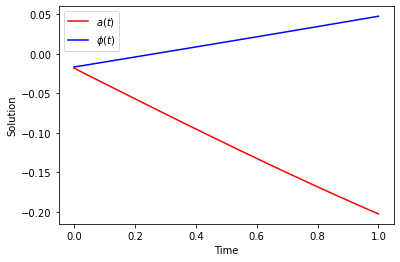

In [44]:
# Version 3
"""model = NN()
t_tensor = tf.convert_to_tensor(np.linspace(t_in, t_fi, 100).reshape(-1, 1), dtype=tf.float32)
t0 = tf.constant([[t_in]], dtype=tf.float32)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
epoch = 0
max_epochs = 10000  # กำหนดจำนวน epoch สูงสุดเพื่อป้องกันการฝึกนานเกินไป

previous_loss = 10  # กำหนดค่าเริ่มต้นให้เป็นค่าที่สูงมาก

# Loop until the difference in loss is smaller than tolerance or until max_epochs is reached
while True:
    with tf.GradientTape() as tape:
        loss = loss_fn(t_tensor, model)
    
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
#    previous_loss = loss.numpy()
    # คำนวณความแตกต่างของค่า loss ระหว่าง epoch ปัจจุบันกับ epoch ก่อนหน้า
    print(loss.numpy(),previous_loss)
    loss_diff = abs(previous_loss - loss.numpy())

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.numpy()}, Loss Diff: {loss_diff}')

    # เช็คว่า loss_diff ต่ำกว่าค่า tolerance หรือยัง
#    if loss_diff < 0.00001:
#        print(f"Stopping early at epoch {epoch} with loss difference {loss_diff}")
#        break
    
    # เช็คว่าเกินจำนวน epoch สูงสุดหรือยัง
    if epoch >= max_epochs:
        print(f"Reached maximum epochs: {epoch}")
        break
    if epoch == 0:
        previous_loss = loss.numpy()
    # Update previous_loss สำหรับการคำนวณในรอบถัดไป
    if epoch % 100 == 0:
        previous_loss = loss.numpy()
    epoch += 1

# Results
u_pred = model(t_tensor).numpy()
t_data = np.linspace(t_in, t_fi, 100).reshape(-1, 1)
u1_pred, u2_pred = u_pred[:, 0], u_pred[:, 1]
print(epoch, loss.numpy())

# Plot results
plt.plot(t_data, u1_pred, label='$a(t)$', color='r')
plt.plot(t_data, u2_pred, label='$\phi(t)$', color='b')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.legend()
plt.show()
"""

In [10]:
x1 = np.sqrt(3)/np.sqrt(rho_m0+rho_r0+rhol)
x1

0.9999547730683981